## 데이터 전처리

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv('content/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### 원-핫 인코딩

In [7]:
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID', 'SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)

y = df['Class']

In [8]:
# 타겟 변수 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Class'])  # 'H', 'L', 'M' → 2, 0, 1로 변환

In [9]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
1,20,20,3,25,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
2,10,7,0,30,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,30,25,5,35,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,40,50,12,50,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
476,50,77,14,28,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
477,55,74,25,29,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
478,30,17,14,57,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


### 학습 데이터와 테스트 데이터 분리

In [10]:
# train_test_split을 이용하여 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression 모델 학습

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [21]:
lr_pred = lr_model.predict(X_test_scaled)

In [22]:
lr_acc = accuracy_score(y_test, lr_pred)
print(classification_report(y_test, lr_pred))  

              precision    recall  f1-score   support

           H       0.67      0.64      0.65        22
           L       0.79      0.85      0.81        26
           M       0.74      0.73      0.74        48

    accuracy                           0.74        96
   macro avg       0.73      0.74      0.73        96
weighted avg       0.74      0.74      0.74        96



Logistic Regression 모델의 정확도는 0.74

#### XGBoost 모델 학습

In [24]:
model_xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)
model_xgb.fit(X_train_scaled, y_encoded[y_train.index])

xgb_pred = model_xgb.predict(X_test_scaled)

xgb_pred_labels = label_encoder.inverse_transform(xgb_pred)
y_test_encoded = label_encoder.transform(y_test)

In [25]:
xgb_pred = model_xgb.predict(X_test_scaled)
print(classification_report(y_test_encoded, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.83      0.92      0.87        26
           2       0.85      0.81      0.83        48

    accuracy                           0.83        96
   macro avg       0.83      0.84      0.83        96
weighted avg       0.83      0.83      0.83        96



XGBoost 모델 정확도는 0.86

In [17]:
# model_lr.coef_ : rows = target, columns = feature
print(lr_model.coef_.shape)  # (3, 59)
print(lr_model.classes_)  # ['H' 'L' 'M']

(3, 59)
['H' 'L' 'M']


### Logisic Regression 모델 특성중요도 파악

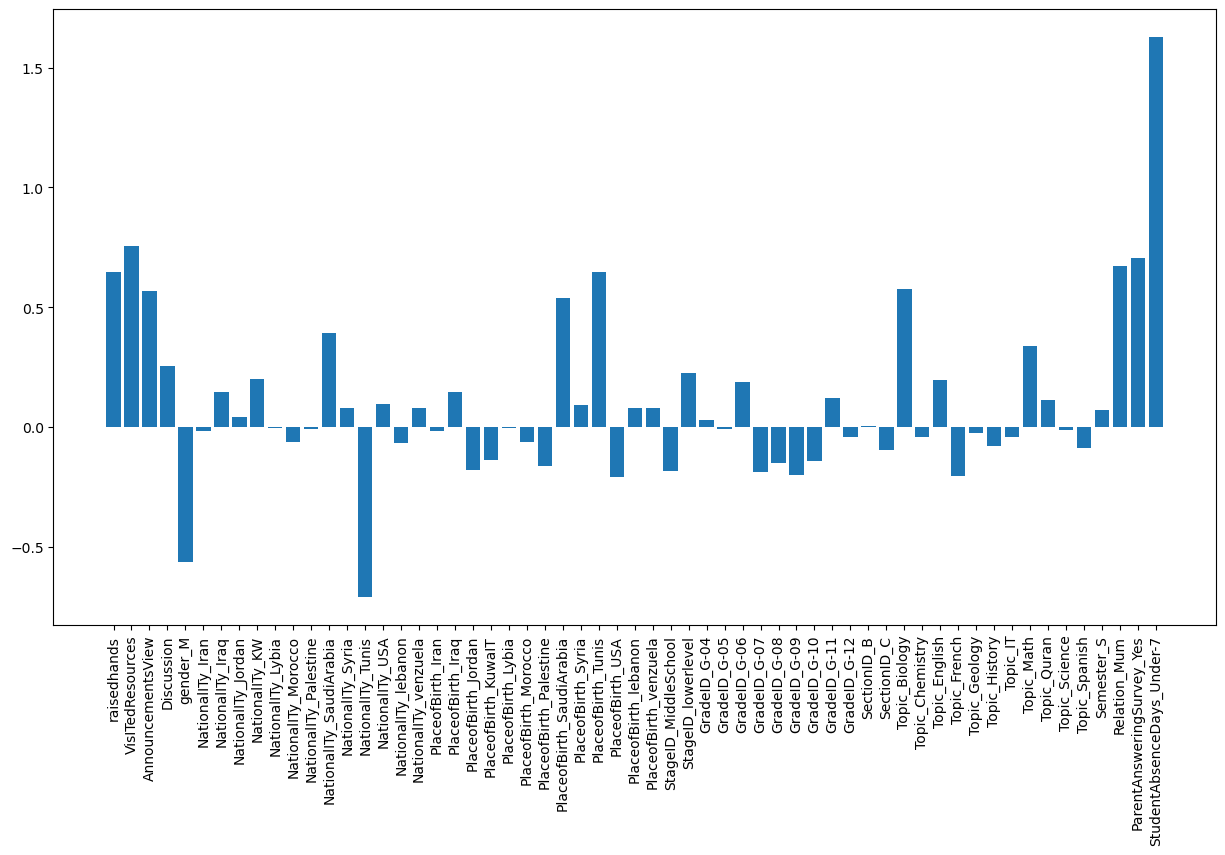

In [26]:
# Logistic Regression 모델의 coef_ 속성으로 plot 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, lr_model.coef_[0, :])
plt.xticks(rotation=90)
plt.show()

StudentAbseneDays_Under-7의 중요도가 압도적으로 높게 나온다.

#### XGBoost 모델의 특징의 중요도

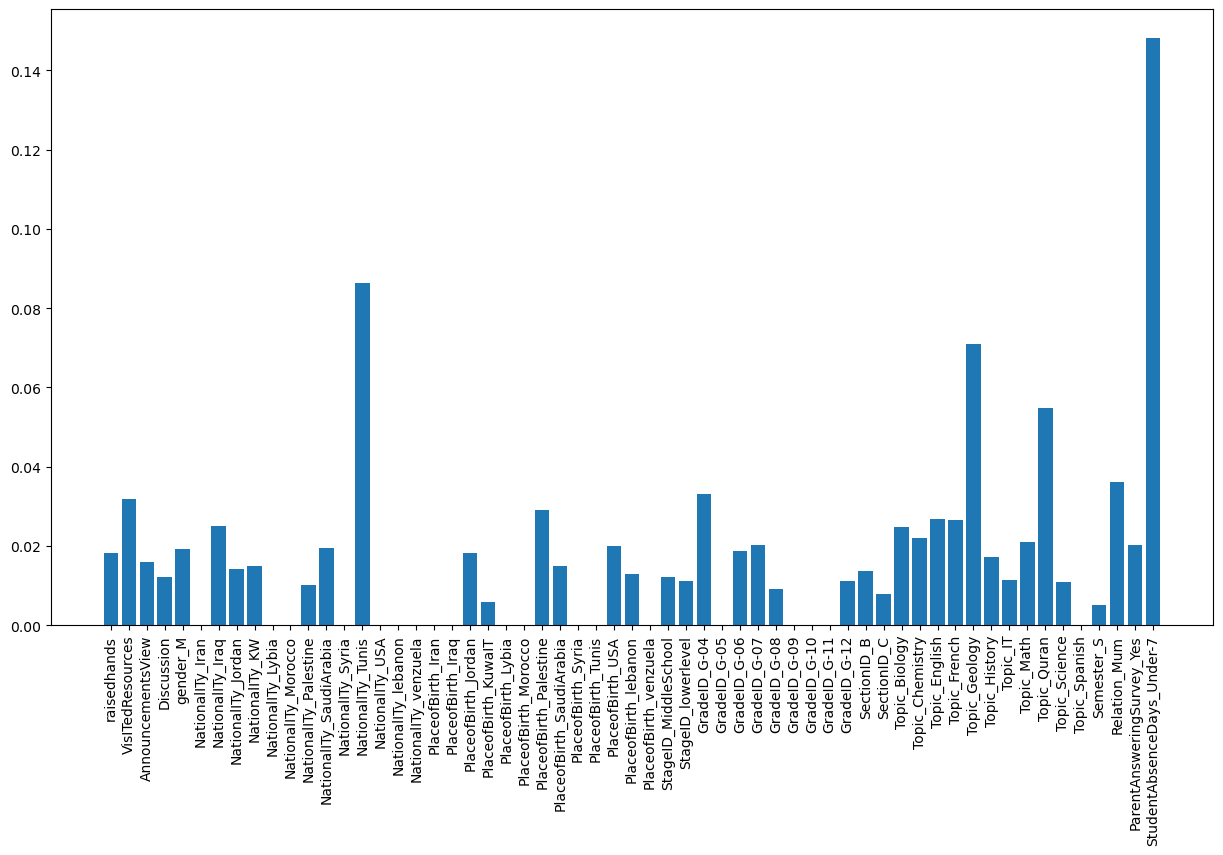

In [20]:
# XGBoost 모델의 feature_importances_ 속성으로 plot 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

StudentAbseneDays_Under-7의 중요도가 압도적으로 높게 나온다.